In [130]:
import dash
from dash.dependencies import Input, Output, State, ClientsideFunction
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
import plotly.graph_objects as go
import plotly.express as px


from datetime import datetime as dt
import json
import numpy as np
import pandas as pd
import os
import geopandas

# Recall app


In [110]:

df = pd.read_csv("ds4a_dash_project2/data/Conexiones_Zonas.csv")
df['Total']=df['ene-21']+df['feb-21']+df['mar-21']+df['abr-21']
df = df.drop(df.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14]], axis=1)
df2=df.drop(df.columns[[0,1, 6]], axis=1)
df_mes=df2.sum(axis = 0, skipna = True).reset_index()
df_mes = df_mes.rename(columns={'index': 'Mes', 0: 'Conexiones'})
max=4
df_mes=df_mes.iloc[0:max]


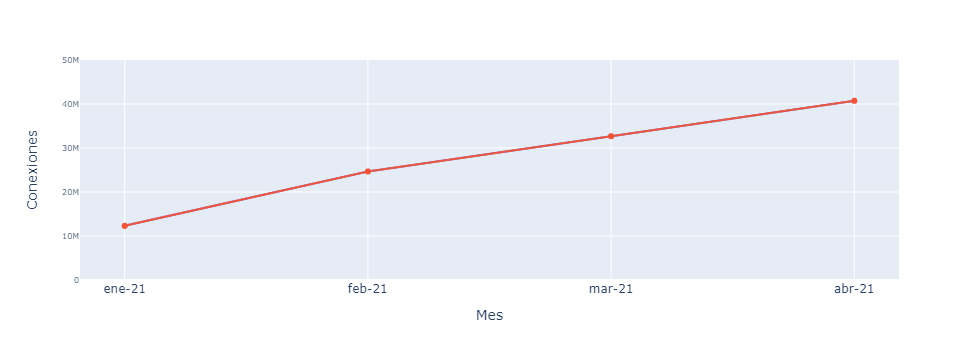

In [112]:
fig = px.line(df_mes, x="Mes", y="Conexiones" )
fig.add_scatter(x=df_mes['Mes'], y=df_mes['Conexiones'])
fig.update_layout(showlegend=False)
fig.update_yaxes(tickfont=dict(size=8),range=[0, 50000000])
fig.show()

In [35]:
df_u=pd.read_csv("ds4a_dash_project2/data/Usabilidad_Zonas.csv")
df_u.head()

,USO,Porcentaje Enero 2021,Porcentaje Febrero 2021,Porcentaje Marzo 2021,Porcentaje Abril 2021,PROMEDIO
0,Protocolos de Red,70.3,70.4,70.5,70.6,70.5
1,Medios de transmisión,10.5,10.6,10.7,10.8,10.7
2,Web,7.6,7.7,7.8,7.9,7.8
3,Redes Sociales,6.2,6.3,6.4,6.5,6.4
4,Mensajería Instantánea,1.8,1.9,2.0,2.1,2.0


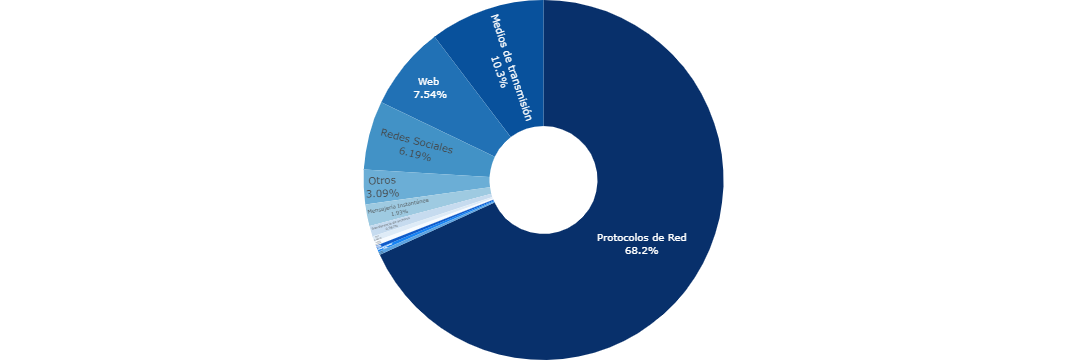

In [79]:
Pie_fig=px.pie(df_u, 
                values='PROMEDIO', 
               names='USO',
               height=235,
               hole=0.3,
               color_discrete_sequence= px.colors.sequential.Blues_r,
               
               )
Pie_fig.update_traces(textposition='inside', textinfo='percent+label',  )
Pie_fig.update_layout(font=dict(
        size=10,
        color="#167AC6",
    
        
    ))
Pie_fig['layout'].update(margin=dict(l=0,r=0,b=0,t=0))
Pie_fig.update(
           layout_showlegend=False,
)

Pie_fig.show()

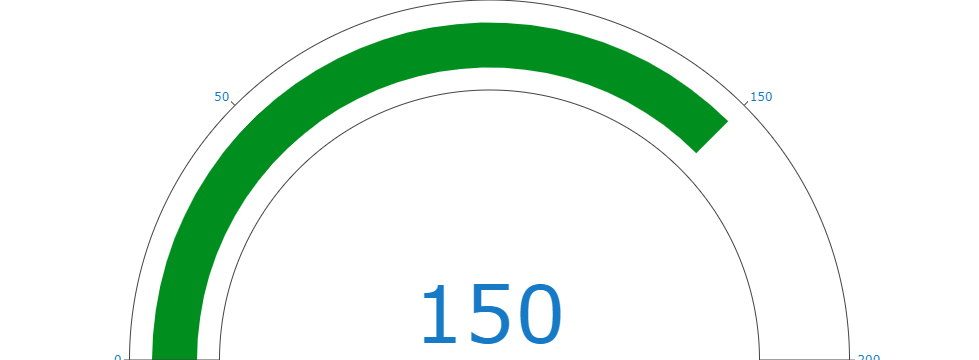

In [128]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 150,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Instaladas"},
    gauge = {'axis': {'range': [None, 200]}, 'bar': {'color': "#008e1f"},}

))
fig['layout'].update(margin=dict(l=0,r=0,b=0,t=0), font=dict(color="#167AC6"), paper_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

In [179]:
ibague=geopandas.read_file("ds4a_dash_project2/data/MGN_ANM_MANZANA_IBAGUE.geojson", driver="GeoJson")
df = pd.read_csv("ds4a_dash_project2/data/ubicacion_zonasvibra.csv")
lats=df["Latitud"] 
lons=df["Longitud"]
h_name=df['ZONAS VIBRA']


In [182]:
ibague.NMB_LC_CM.unique()

array(['COMUNA 01', 'COMUNA 02', 'COMUNA 03', 'COMUNA 04', 'COMUNA 05',
       'COMUNA 06', 'COMUNA 07', 'COMUNA 08', 'COMUNA 12', 'COMUNA 11',
       'COMUNA 10', 'COMUNA 09', 'COMUNA 13', None], dtype=object)

In [201]:
ibague.NMB_LC_CM=ibague.NMB_LC_CM.fillna('otros')
ibague.NMB_LC_CM.unique()

array(['COMUNA 01', 'COMUNA 02', 'COMUNA 03', 'COMUNA 04', 'COMUNA 05',
       'COMUNA 06', 'COMUNA 07', 'COMUNA 08', 'COMUNA 12', 'COMUNA 11',
       'COMUNA 10', 'COMUNA 09', 'COMUNA 13', 'otros'], dtype=object)

In [231]:
comuna=ibague[ibague['NMB_LC_CM']=='otros']


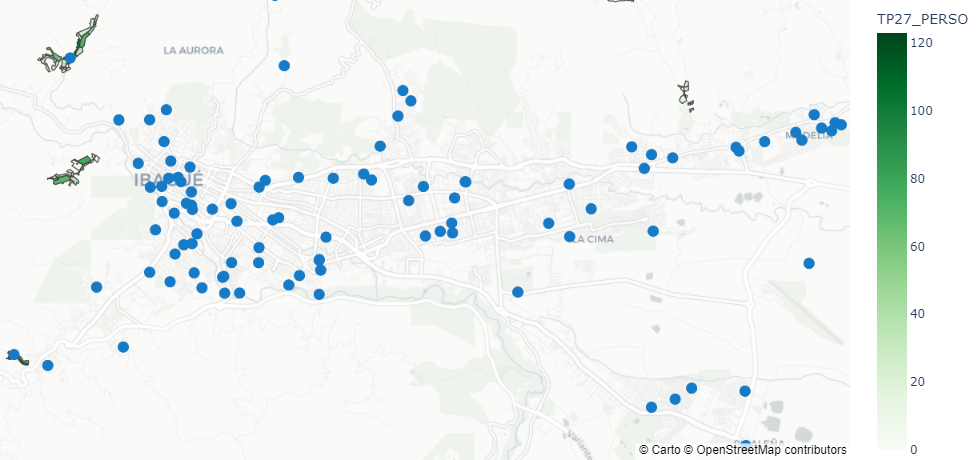

In [232]:
fig = px.choropleth_mapbox(comuna, geojson=comuna.geometry, 
                    locations=comuna.index, color="TP27_PERSO",
                    height=600,
                   color_continuous_scale="Greens",
                    labels={'STP32_1_SE':'Cantidad de hombres'},
                     mapbox_style='carto-positron'
                   )
fig.add_scattermapbox( lat=lats, 
                                       lon=lons, 
                                       mode = 'markers', 
                                       hovertext=h_name, marker_size=12,
                                       marker_color='#167AC6', hoverlabel={ })
fig.update_layout(mapbox_zoom = 12, 
                               height=460,
                               mapbox_center = {"lat": 4.435800, "lon": -75.199009}) 
fig.update_layout(transition_duration=500)
fig['layout'].update(margin=dict(l=0,r=0,b=0,t=0))
fig.show()